# PAP2: V233 Fourieroptik

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.constants as sc
%matplotlib inline

## Aufgabe 1:

Werte in roher Form:
Beste Werte aus Fit:
[ 90.55454546   0.69999847]
Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)
[ 0.08442807  0.28001702]
Chiquadratsumme:
0.696969696972
Fitwahrscheinlichkeit=100.0%

Positionen der Maxima:
[-498 -410 -311 -217 -127    0  129  226  314  412  499]
Berechnete Ordnungen via Fitgerade
[-5.50717798 -4.535388   -3.44212427 -2.40407588 -1.41019976 -0.00773013
  1.41682564  2.48800323  3.45979321  4.54201387  5.50276078]
Fehler auf Ordnungen
[ 0.03366705  0.03354082  0.03342761  0.03334862  0.03329917  0.03327321
  0.03329942  0.03335397  0.0334292   0.0335416   0.03366642]
Theoretische Ordnung der Minima und Maxima
[-5.48154297 -4.47744141 -3.47080078 -2.45908203 -1.43037109 -0.30009766
  1.43037109  2.45908203  3.47080078  4.47744141  5.48154297]
Abweichung der Messung vom theoretischen Wert
[ 0.76142726  1.72764371  0.85786898  1.64942837  0.60576076  8.78687588
  0.40677761  0.86709923  0.32928012  1.92514555  0.63023674]


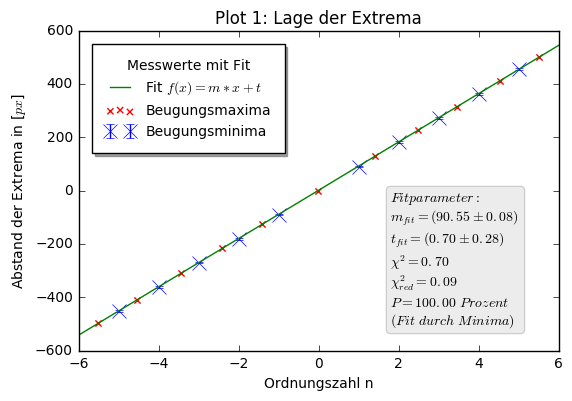

In [9]:
#Aufgabe 1: Plotte Lage der Max/Min gegen Ordnungszahl

#Ordnungen von Minima und Maxima
ordmin = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])
ordmax = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

#Lage der Minima und Maxima
posmin = np.array([549, 640, 731, 820, 911, 1091, 1182, 1273, 1364, 1456])
posmax = np.array([503, 591, 690, 784, 874, 1001, 1130, 1227, 1315, 1413, 1500])

pos0 = 1001 #Lage des Hauptmaximums in pixel
del_pos = 3 #Fehler der Lage des Hauptmaximums

#Relative Abstände der Minima und Maxima berechnen
posmin = posmin - pos0
posmax = posmax - pos0

# Fit mit einer Gerade
def fit(x, m, t):
    return m*x+t 
l = np.linspace(-8,8,100)

#Fit durchführen
popt, pcov = curve_fit(fit, ordmin, posmin, maxfev=5000, sigma=3)
perr = np.sqrt(np.diag(pcov))

#Güte des Fits
chisquare=np.sum((((fit(ordmin,*popt))-posmin)/(3))**2)
dof=8 #degrees of freedom, Freiheitsgrad Anzahl Messwerte minus Fitparameter
chisquare_red=chisquare/dof
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 

# Berechnen der Ordnung der Maxima aus Position y[px]
def ord_max(y):
    return (y - popt[1])/popt[0]
def d_ord_max(y):
    return np.sqrt((3/popt[0])**2 + (perr[1]/popt[0])**2 + ((y-popt[1])*perr[0]/(popt[0]**2))**2)

#Plot objektorientiert erstellen
fig = plt.figure()
ax = fig.add_axes([0.15,0.13,0.8,0.8])
ax.errorbar(ordmin, posmin, yerr=3, marker='x',markersize='10', linestyle='None', label="Beugungsminima")
ax.scatter(ord_max(posmax), posmax, marker='x',color='red', label='Beugungsmaxima')
ax.plot(l, fit(l, *popt), label="Fit $f(x)=m*x+t$")
ax.set_xlabel("Ordnungszahl n")
ax.set_ylabel("Abstand der Extrema in [$px$]")
ax.set_title("Plot 1: Lage der Extrema")
ax.legend(title='Messwerte mit Fit', borderpad=1.0, borderaxespad=1, loc='best', shadow='true', fontsize='medium')
ax.set_xlim((-6,6))
ax.set_ylim((-600, 600))

textstr ='$Fitparameter:$ \n$m_{fit}=(%.2f \pm%.2f)$ \n$t_{fit}=(%.2f \pm%.2f)$ \n$\chi^{2}=%.2f$ \n$\chi_{red}^{2}=%.2f$ \n$P=%.2f\ Prozent$ \n$(Fit\ durch\ Minima)$' %(popt[0], perr[0], popt[1], perr[1], chisquare, chisquare_red, prob)
props=dict(boxstyle='round', facecolor='grey', alpha=0.15)
ax.text(0.65, 0.5, textstr, transform=ax.transAxes, fontsize='medium', verticalalignment='top', bbox=props)

#Theoretische Lage der Minima und Maxima

#die theoretischen Werte werden auch zuverlässig von WolframAlpha berechnet:
#http://www.wolframalpha.com/input/?i=local+maxima+of+(sin(pi*x)%2F(pi*x))%5E2

d = 2.542 * 10**-4 #Spaltbreite
tol = 0.0001
del_n_theo = tol
n_theo = np.array([])
def theoord(d,n):
    return d *(np.cos(np.pi*n)/n - np.sin(np.pi * n)/np.pi /n**2)

def bisection(a,b,tol):
    c = (a+b)/2.0
    while (b-a)/2.0 > tol:
        if theoord(d,c) == 0:
            return c
        elif theoord(d,a)*theoord(d,c) < 0:
            b = c
        else :
            a = c
        c = (a+b)/2.0
    return c

i = -6
while i <= 5:
    if i == 0:
        i +=1
    else:
        a = i+0.3
        b = i + 0.7
        temp = np.array([bisection(a,b,tol)])
        n_theo = np.hstack([n_theo,temp])
        i +=1

#Berechnung der Abweichung vom theoretisch erwarteten Wert: 
sig = np.abs(n_theo-ord_max(posmax))/d_ord_max(posmax)

print('Werte in roher Form:')
print('Beste Werte aus Fit:')
print(popt)
print('Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)')
print(perr)
print('Chiquadratsumme:')
print (chisquare)
print("Fitwahrscheinlichkeit="+str(prob)+"%")

print()
print("Positionen der Maxima:")
print(posmax)
print("Berechnete Ordnungen via Fitgerade")
print(ord_max(posmax))
print("Fehler auf Ordnungen")
print(d_ord_max(posmax))
print("Theoretische Ordnung der Minima und Maxima")
print(n_theo)
print("Abweichung der Messung vom theoretischen Wert")
print(sig)

#plt.savefig('v233_1.pdf',format='pdf', pad_inches=0.2)

Werte in roher Form:
Beste Werte aus Fit:
[  2.07223822e-06   3.79367572e-05]
Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)
[  3.54265878e-08   1.06708619e-05]
Chiquadratsumme:
0.347959825439
Fitwahrscheinlichkeit=95.0%


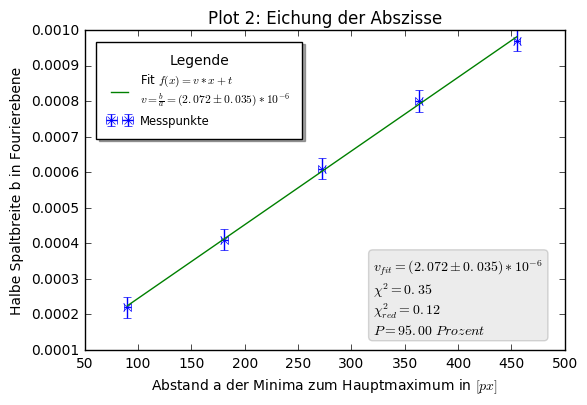

In [11]:
#Eichung der Abszisse:

b = np.array([22, 41, 61, 80, 97]) #halbe Spaltbreite bei Verschwinden der Ordnungen 1 bis 5
b = b*10**(-5) #Größe des halben Spaltes in Metern
a = np.array([90,  181,  272,  363,  455]) #Position der Minima in Pixeln
err = 3*10**(-5)
x = np.array([1,2,3,4,5])

# Fit mit einer Gerade
def fit(x, m, t):
    return m*x+t 

#Fit durchführen
popt, pcov = curve_fit(fit, a, b, maxfev=5000, sigma=err)
perr = np.sqrt(np.diag(pcov))

#Güte des Fits
chisquare=np.sum((((fit(a,*popt))-b)/(err))**2)
dof= 3#degrees of freedom, Freiheitsgrad Anzahl Messwerte minus Fitparameter
chisquare_red=chisquare/dof
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 

#Plot objektorientiert erstellen
fig = plt.figure()
ax = fig.add_axes([0.15,0.12,0.8,0.8])
ax.errorbar(a, b, marker='x', xerr=3, yerr=err, linestyle='None', label="Messpunkte")
ax.plot(a, fit(a, *popt), label='Fit $f(x)=v*x+t$ \n$v= \\frac{b}{a} =(%.3f \pm %.3f)*10^{-6}$' %(popt[0]*10**6, perr[0]*10**6))
ax.set_xlabel("Abstand a der Minima zum Hauptmaximum in $[px]$")
ax.set_ylabel("Halbe Spaltbreite b in Fourierebene")
ax.set_title("Plot 2: Eichung der Abszisse")
ax.legend(title='Legende', borderpad=1.0, borderaxespad=1, loc='best', shadow='true', fontsize='small')
textstr ='$v_{fit}=(%.3f \pm%.3f)*10^{-6}$ \n$\chi^{2}=%.2f$ \n$\chi_{red}^{2}=%.2f$ \n$P=%.2f\ Prozent$' %(popt[0]*10**6, perr[0]*10**6,chisquare, chisquare_red, prob)
props=dict(boxstyle='round', facecolor='grey', alpha=0.15)
ax.text(0.6, 0.3, textstr, transform=ax.transAxes, fontsize='medium', verticalalignment='top', bbox=props)

print('Werte in roher Form:')
print('Beste Werte aus Fit:')
print(popt)
print('Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)')
print(perr)
print('Chiquadratsumme:')
print (chisquare)
print("Fitwahrscheinlichkeit="+str(prob)+"%")

plt.savefig('v233_2.pdf',format='pdf')

## Aufgabe 2:

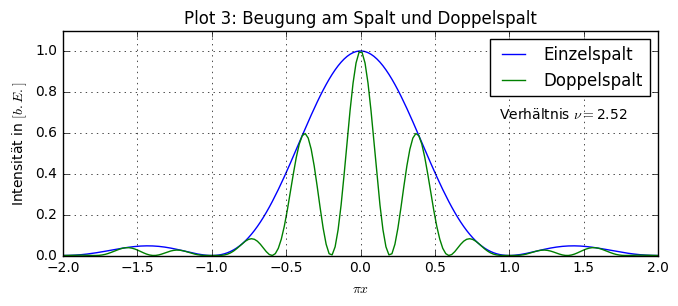

In [32]:
# Berechnung der Beugungsbilder 

# Beugungsfunktion des Einfachspaltes
def beugung_spalt(x):
    return np.sinc(x)**2

# Beugungsfunktion des Doppelspaltes
# Normiere, damit I_0 1 ist
def beugung_doppelspalt(x,nu):
    return np.sinc(x)**2*np.cos(np.pi*nu*x)**2

#Anzahl a der Nebenmaxima die dargestellt werden sollen:
a=1
#Verhältnis von Spaltabstand zu Spaltbreite:
v=2.52
#Abszissenwerte:
x=np.linspace(-(a+1),a+1,200)
#Erstellung der Graphik
fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0.1,0.12,0.85,0.75])
ax.plot(x,beugung_spalt(x), label='Einzelspalt')
ax.plot(x,beugung_doppelspalt(x, v), label='Doppelspalt')
ax.set_xlabel('$\pi x$')
ax.set_ylabel('Intensität in $[b.E.]$')
ax.set_title('Plot 3: Beugung am Spalt und Doppelspalt')
ax.set_ylim((0,1.1))
ax.legend()
ax.text(0.93,0.67, r'Verhältnis $\nu=${:.3}'.format(v))
ax.grid(True)

#plt.savefig('v233_3.pdf', format="pdf")

In [13]:
#Finde die Intensitätsmaxima der Theoretischen Verteilung

#Wolfram Alpha
#http://www.wolframalpha.com/input/?i=local+maxima+between+-1+and+1+of+(sin(pi*x)%2F(pi*x))%5E2+*cos%5E2(2.52*pi*x)

def maxima(nu):
    y = beugung_doppelspalt(x, nu)
    y_max=[]
    for i in range(9):
        y_max.append(np.max(y[22*i:22*(i+1)]))
    
    #Normiere auch wirklich auf I_0    
    y_max = y_max/y_max[4]
    return y_max
print('Maxima für nu=2.52:')
print(maxima(2.52))

Maxima für nu=2.52:
[ 0.03834973  0.03848209  0.0826167   0.60033383  1.          0.60033383
  0.0826167   0.03201526  0.03848209]


## Aufgabe 3:

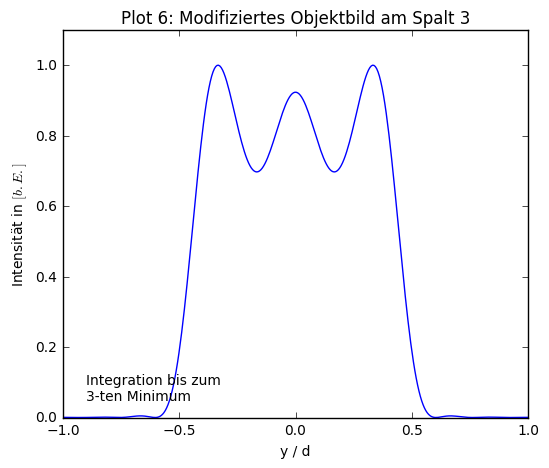

In [58]:
#Berechnung der modifizierten Spaltbilder

#Für den Einfachspalt:

#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

d=0.428 #Spaltbreite auf 1 setzen
n=3 #Integrationsbereich

#y-Werte
Y=np.linspace(-d,d,800*d)

#Berechnung des resultierenden Objektbilds am Spalt
from scipy.integrate import quad
f_modifiziert=[]
for i in range(len(Y1)):
    y=Y[i]
    result, error= quad(spalt, -2*np.pi*n/d, 0)
    f_modifiziert.append(result**2)

f_modifiziert = f_modifiziert/np.max(f_modifiziert)

#Darstellung des modifizierten Spaltbilds
plt.rcParams["figure.figsize"][0] = 6
plt.rcParams["figure.figsize"][1] = 5
plt.plot(Y/d, f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensität in $[b.E.]$')
plt.title('Plot 6: Modifiziertes Objektbild am Spalt 3')
plt.ylim((0,1.1))
plt.text(-0.9,0.05,'Integration bis zum \n{}-ten Minimum'.format(n))

plt.savefig('v233_6.pdf', format="pdf")